# Example 1 - Design and visualise a hydrofoil

In [1]:
# Imports
from foilpy.classes import LiftingSurface, FoilAssembly
from foilpy.utils import knts2ms, ms2knts
import numpy as np
# allows to pan and zoom plots
%matplotlib widget 

## Define flow speed and reynolds number input

In [2]:
# Seawater properties: https://www.engineeringtoolbox.com/sea-water-properties-d_840.html
# Assumes 15 deg temperature seawater
speed_knts = 15
speed_ms = knts2ms(speed_knts)
chord = 0.2 # meters
re = speed_ms * chord * 1026 / 0.00126
print("Reynolds number = ", str(re), "\n")

# Define simple motion vector, moving forward in y
u_motion = np.array([0, speed_ms, 0]).reshape(1, 3)
print("Input velocity vector = ", str(u_motion), " m/s (= ", str(ms2knts(u_motion)), " knots)\n ")


Reynolds number =  1256714.6040819855 

Input velocity vector =  [[0.         7.71666862 0.        ]]  m/s (=  [[ 0. 15.  0.]]  knots)
 


## Define a front wing with square tips

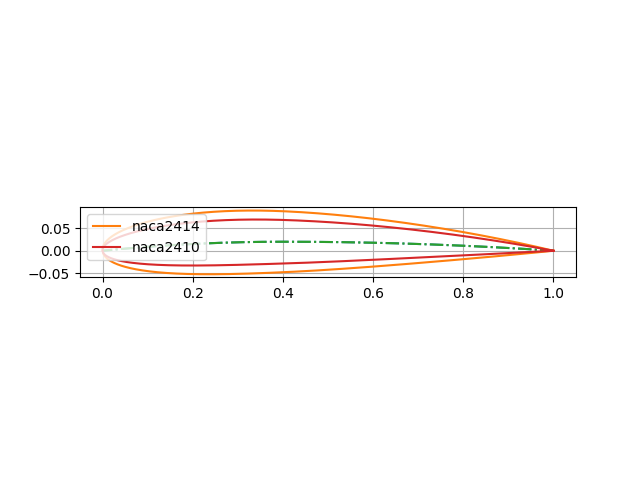

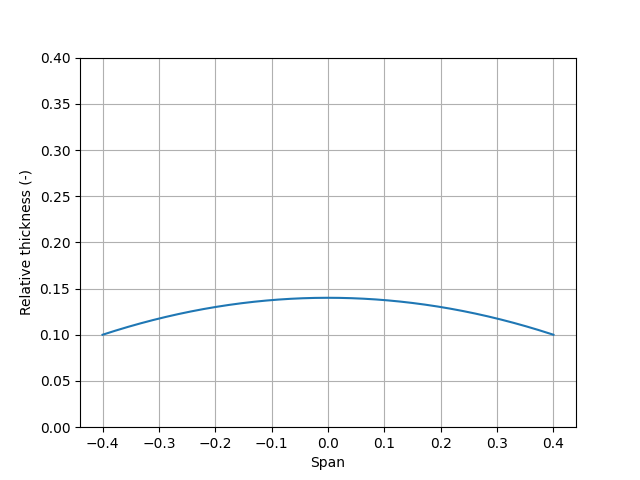

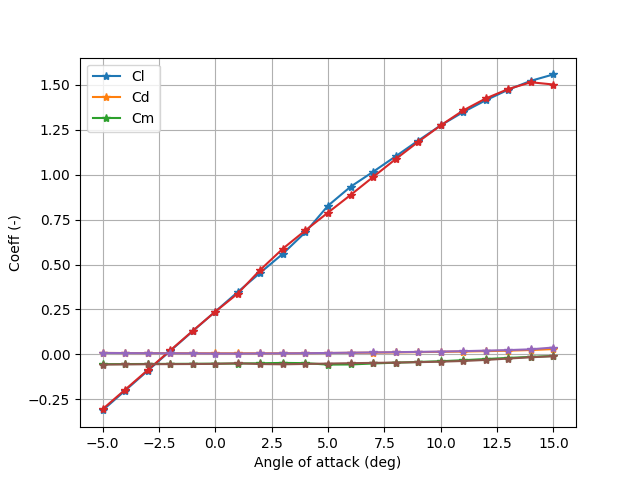

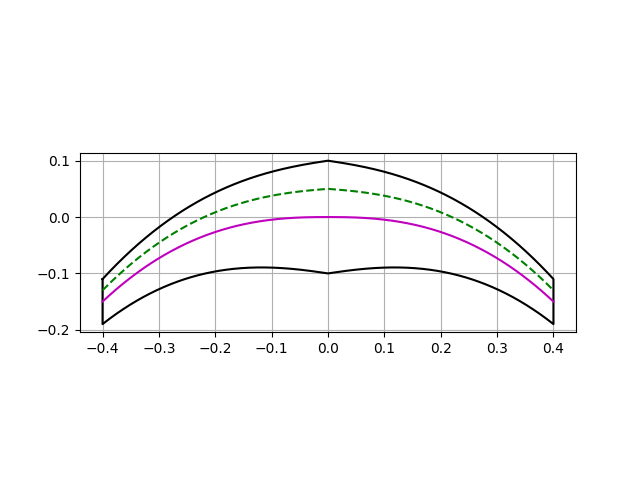

In [3]:
# Instantiate a front wing
afoil = [['naca2414', 0], 
        ['naca2410', 1]]
front_wing = LiftingSurface(rt_chord=200, 
                            tip_chord=80, 
                            span=800,
                            Re=re, # used for calculating afoil properties
                            sweep_tip=-150, 
                            sweep_curve=2.5,    # curvature polynomial order
                            dih_tip=-50, 
                            dih_curve=2,        # curvature polynomial order
                            washout_tip=-3,
                            washout_curve=2,
                            afoil=afoil,
                            nsegs=40,           # n segments used for lifting line representation
                            units='mm')
front_wing.plot2D()

## Define stabiliser and mast in the same fashion

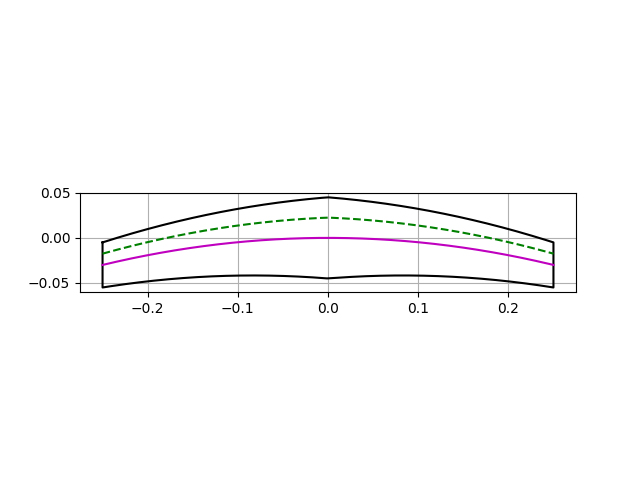

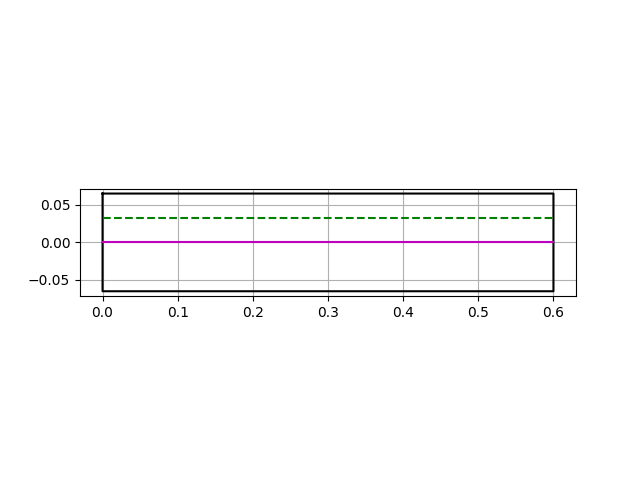

In [4]:
# Instantiate stabiliser
afoil = [['naca0012', 0], ['naca0012', 1]]
stabiliser = LiftingSurface(rt_chord=90,
                            tip_chord=50,
                            span=500,
                            Re=re,
                            sweep_tip=-30,
                            sweep_curve=2,
                            dih_tip=30,
                            dih_curve=8,
                            afoil=afoil,
                            nsegs=40,
                            units='mm',
                            plot_flag=False)

stabiliser.plot2D()

afoil = [['naca0015', 0], ['naca0015', 1]]
mast = LiftingSurface(rt_chord=130,
                      tip_chord=130,
                      span=600,
                      Re=re,
                      type='mast',
                      afoil=afoil,
                      nsegs=4,
                      units='mm',
                      plot_flag=False)

mast.plot2D()

## Assemble the foil using the FoilAssembly class

Total mass (without rider) =  8.210999999999999 

Total mass (including rider) =  83.211 

CoG location =  [[0.        ]
 [0.42304587]
 [0.79223781]] 



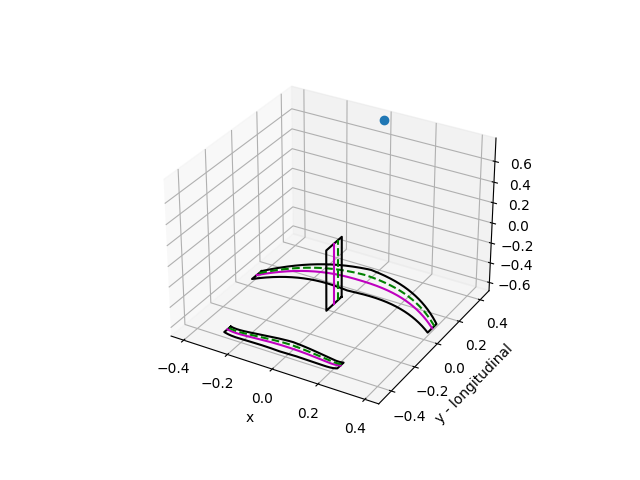

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:xlabel='x', ylabel='y - longitudinal'>)

In [5]:
foil = FoilAssembly(front_wing,
                    stabiliser,
                    mast,
                    fuselage_length=699 - 45 - 45,  # similar to AXIS short black fuselage
                    mast_attachment_ratio=267 - 45, # similar to AXIS short black fuselage
                    wing_angle=1,           # mounting angle
                    stabiliser_angle=-2,    # mounting angle
                    units='mm')

foil.plot_foil_assembly()
# Note, CoG location plotted as a blue dot.

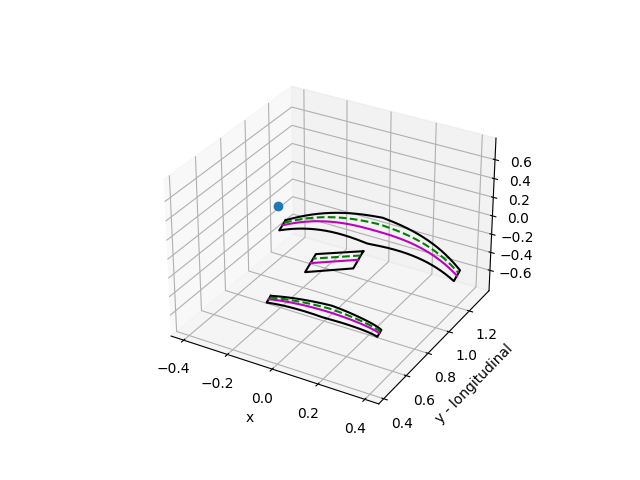

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:xlabel='x', ylabel='y - longitudinal'>)

In [6]:
# rotate foil assembly and plot
# Note, rotations occurs about the centre of mass
foil.rotate_foil_assembly([45, 0, 0]) # 45 degrees pitch
foil.plot_foil_assembly()